In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model

In [38]:
start='2010-01-01'
end='2020-01-01'
df = data.DataReader('ADANIPORTS.NS','yahoo',start,end)
df.head()
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2463.000000,2463.000000,2463.000000,2463.000000,2.463000e+03,2463.000000
mean,250.943406,242.668790,247.065067,246.756471,2.935485e+06,238.991989
std,104.119903,101.928865,103.249305,103.064328,2.887902e+06,102.378951
min,110.449997,105.000000,108.000000,108.000000,0.000000e+00,103.196396
25%,149.399994,143.709999,146.764999,146.300003,1.326630e+06,139.256592
50%,242.000000,232.699997,237.000000,237.000000,2.305175e+06,229.219864
75%,350.125000,337.299988,343.449997,344.474991,3.652405e+06,334.335022
max,452.350006,434.799988,450.000000,448.750000,6.260449e+07,438.315674


In [39]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-26,370.600006,362.100006,368.799988,363.649994,2503435.0,357.172729
2019-12-27,367.899994,362.799988,366.750000,363.700012,2146972.0,357.221863
2019-12-30,371.000000,363.750000,371.000000,365.950012,4732203.0,359.431763
2019-12-31,368.649994,364.899994,366.000000,366.000000,2043206.0,359.480896
2020-01-01,379.250000,366.000000,368.000000,377.649994,11377167.0,370.923370


In [40]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,112.559998,110.699997,111.000000,111.349998,1079040.0,104.207413
1,2010-01-05,116.699997,111.800003,111.959999,115.190002,2112500.0,107.801094
2,2010-01-06,122.000000,113.070000,115.800003,120.900002,5761450.0,113.144806
3,2010-01-07,123.209999,119.000000,121.489998,119.470001,3174260.0,111.806549
4,2010-01-08,121.699997,118.639999,119.400002,119.330002,1220560.0,111.675522


In [41]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,112.559998,110.699997,111.000000,111.349998,1079040.0
1,116.699997,111.800003,111.959999,115.190002,2112500.0
2,122.000000,113.070000,115.800003,120.900002,5761450.0
3,123.209999,119.000000,121.489998,119.470001,3174260.0
4,121.699997,118.639999,119.400002,119.330002,1220560.0


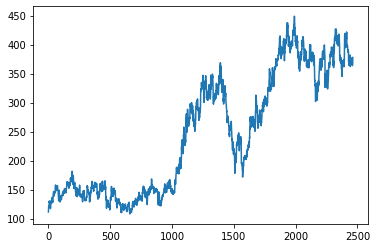

In [42]:
plt.plot(df.Close)

In [43]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2458    379.638502
2459    379.537002
2460    379.462002
2461    379.346502
2462    379.412002
Name: Close, Length: 2463, dtype: float64

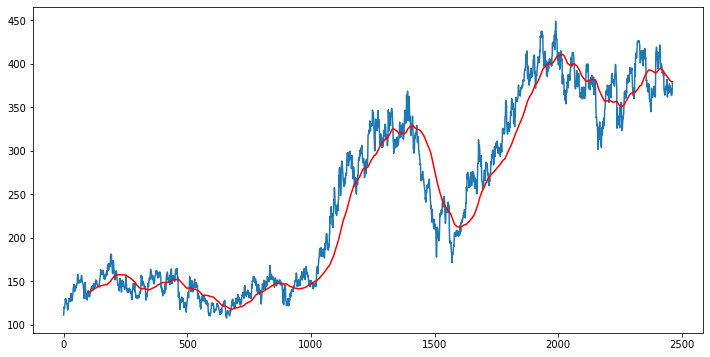

In [44]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [45]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2458    384.76400
2459    384.95625
2460    385.15675
2461    385.32075
2462    385.51275
Name: Close, Length: 2463, dtype: float64

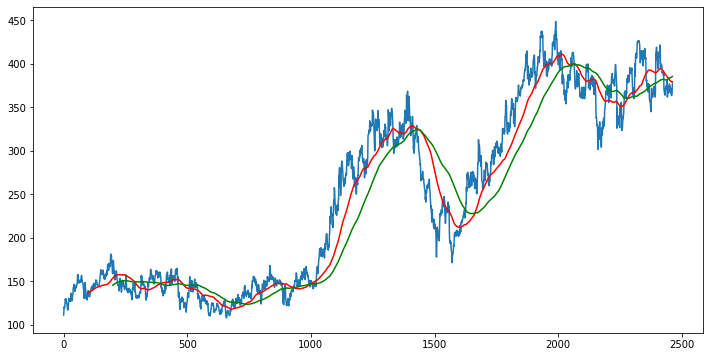

In [46]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [47]:
df.shape

(2463, 5)

In [48]:
# Splitting the data set into training and testing data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1724, 1)
(739, 1)


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [50]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.01285741],
       [0.02759548],
       [0.04951066],
       ...,
       [0.61005573],
       [0.61600463],
       [0.60122818]])

In [51]:
x_train=[]
y_train=[]
for  i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

In [52]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential


In [53]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
51/51 [==============================] - 17s 194ms/step - loss: 0.0459
Epoch 2/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0099
Epoch 3/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0098
Epoch 4/50
51/51 [==============================] - 11s 215ms/step - loss: 0.0086
Epoch 5/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0075
Epoch 6/50
51/51 [==============================] - 11s 220ms/step - loss: 0.0077
Epoch 7/50
51/51 [==============================] - 12s 232ms/step - loss: 0.0077
Epoch 8/50
51/51 [==============================] - 10s 199ms/step - loss: 0.0060
Epoch 9/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0066
Epoch 10/50
51/51 [==============================] - 10s 197ms/step - loss: 0.0067
Epoch 11/50
51/51 [==============================] - 10s 196ms/step - loss: 0.0079
Epoch 12/50
51/51 [==============================] - 10s 195ms/step - loss: 0.0062
Epoch 13/50
5

In [56]:
model.save('keras_model.h5')

In [57]:
data_testing.head()

,Close
1724,268.450012
1725,273.799988
1726,273.950012
1727,274.899994
1728,287.500000


In [58]:
data_training.tail()

,Close
1719,262.899994
1720,260.000000
1721,266.950012
1722,268.500000
1723,264.649994


In [59]:
past_100_days=data_training.tail(100)

In [60]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\TASHMOY GHOSH\AppData\Local\Temp\ipykernel_21952\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [61]:
final_df.head()

,Close
0,222.850006
1,227.899994
2,234.000000
3,240.649994
4,239.750000


In [62]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.02235497],
       [0.0493581 ],
       [0.07879588],
       [0.07481184],
       [0.15759189],
       [0.13567948],
       [0.15670648],
       [0.22443552],
       [0.19831779],
       [0.23284643],
       [0.22222215],
       [0.2111553 ],
       [0.2197875 ],
       [0.20916335],
       [0.17220007],
       [0.15427183],
       [0.17596282],
       [0.17751221],
       [0.17751221],
       [0.15869857],
       [0.20075258],
       [0.21137672],
       [0.21868081],
       [0.23351041],
       [0.21845953],
       [0.16445328],
       [0.185259  ],
       [0.19721111],
       [0.21381137],
       [0.23594506],
       [0.20916335],
       [0.20739268],
       [0.23240372],
       [0.23129704],
       [0.21049132],
       [0.185259  ],
       [0.21314739],
       [0.15028766],
       [0.15006638],
       [0.18437359],
       [0.20296595],
       [0.18857905],
       [0.18614426],
       [0.19477646],
       [0.18216023],
       [0.12505534],
       [0.139

In [63]:
input_data.shape

(839, 1)

In [64]:
x_test=[]
y_test=[]
for  i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
x_test, y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(739, 100, 1)
(739,)


In [65]:
y_predicted=model.predict(x_test)
y_predicted.shape

(739, 1)

In [66]:
y_test.shape

(739,)

In [67]:
y_predicted.shape

(739, 1)

In [68]:
scalar=scaler.scale_

In [69]:
scale_factor=1/(scalar[0])
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

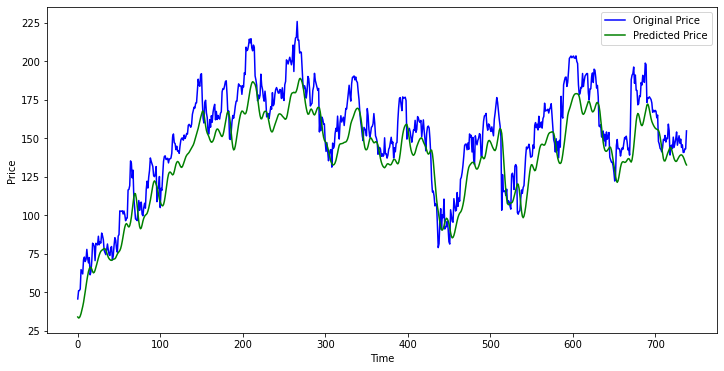

In [71]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'g',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()